In [4]:
%pylab inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
sys.path.append("/Users/uchihashi_k/Desktop/projects/lb_time/utils")

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.grid_search import GridSearchCV
from sklearn.externals import joblib
import sklearn

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import seaborn as sns

In [8]:
import function
import preprocessing
import local_bayes
import visualize

In [23]:
sys.path.append("/Users/uchihashi_k/Desktop/projects/lb_time/models/cnn")

In [10]:
p = preprocessing.Preprocessing(data_dir = "../original_data/bookmark/")

# data load

In [11]:
## 注意: このデータロードはdataを入力とする場合, 関数ごとに毎回必要
ajax = p.load_data("ajax.twd")

In [12]:
category_ts, category_sum = p.timeseries(ajax)

56000 web page ended

## example

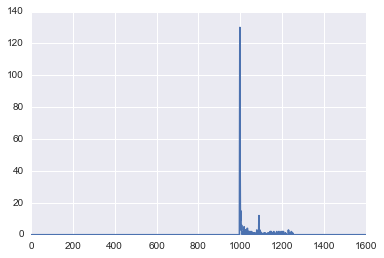

In [13]:
plt.plot(category_ts[0])

In [14]:
category_started_ts = p.make_started_ts(category_ts)

2000

In [15]:
category_started_ts[0]

[75,
 130,
 37,
 11,
 9,
 15,
 7,
 3,
 3,
 6,
 3,
 1,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 1,
 2,
 5,
 1,
 0,
 0,
 2,
 1,
 3,
 0,
 2,
 3,
 0,
 1,
 0,
 3,
 3,
 4,
 4,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 12,
 2,
 0,
 1,
 3,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 2,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 

In [16]:
category_input_ts, category_label, category_input_sum = p.make_supervised_data(category_started_ts)

11891 data created

In [17]:
category_input_ts[0]

array([ 75, 130,  37,  11,   9,  15,   7,   3,   3,   6,   3,   1,   1,
         0,   1,   0,   0,   2,   0,   1,   2,   5,   1,   0,   0,   2,
         1,   3,   0,   2])

In [18]:
x, label = p.balancing_sampling(category_input_ts, category_label)

In [20]:
save_data_dir = '../data/bookmark/'
p.make_test_dataset(x, label, save_data_dir)

In [21]:
train_0_0 = numpy.load(save_data_dir + '0_test/0_fold/0_train.npz')

# model training

In [26]:
import cnn

In [30]:
epoch_num = 100
save_model_dir = "../models/cnn/results/awesome_%s/" % epoch_num
os.mkdir("../models/cnn/results/awesome_%s" % epoch_num)
train_0_0 = numpy.load(save_data_dir + '0_test/0_fold/0_train.npz')
test_0_0 = numpy.load(save_data_dir + '0_test/0_fold/0_test.npz')
cnntrain = cnn.CNN(save_model_dir=save_model_dir, epoch_num=epoch_num)

In [31]:
cnntrain.train(train_0_0, test_0_0)

epoch 1
graph generated
train mean loss=0.691335005952, accuracy=0.701671399467, throughput=1356.76559795 images/sec
test  mean loss=0.573565704743, accuracy=0.70563498959
epoch 2
train mean loss=0.548992553636, accuracy=0.730579206949, throughput=1431.98651262 images/sec
test  mean loss=0.568929253254, accuracy=0.718671158345
epoch 3
train mean loss=0.522265422254, accuracy=0.745401032281, throughput=1433.39548908 images/sec
test  mean loss=0.588203713536, accuracy=0.72161480441
epoch 4
train mean loss=0.497982446862, accuracy=0.760643328532, throughput=1432.38753844 images/sec
test  mean loss=0.534682071465, accuracy=0.740538267953
epoch 5
train mean loss=0.497654339918, accuracy=0.762220118658, throughput=1423.50449657 images/sec
test  mean loss=0.534091185957, accuracy=0.745584528871
epoch 6
train mean loss=0.48205068887, accuracy=0.771785975806, throughput=1430.0934032 images/sec
test  mean loss=0.514645833243, accuracy=0.759461731295
epoch 7
train mean loss=0.446132289302, accura